In [10]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

import numpy as np
import pylab as pl

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
boston = load_boston()

print(type(boston))
print(boston.feature_names)
print(boston.data.shape)
print(boston.target.shape)


<class 'sklearn.utils.Bunch'>
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

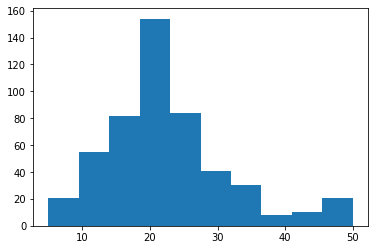

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(boston.target)

In [15]:
x = boston.data
y = boston.target

boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [17]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

#comparisons across methods
a = 1
for name,method in [
        ('Linear regression', LinearRegression()),
        ('Lasso', Lasso(fit_intercept=True, alpha=a)),
        ('Ridge', Ridge(fit_intercept=True, alpha=a)),
        ('Elastic-net', ElasticNet(fit_intercept=True,alpha=a))
        ]:
    
     
    k_fold = KFold(10)
     
    mses=[]
    rsqs=[]
    for k, (train, test) in enumerate(k_fold.split(x, y)):
        method.fit(x[train],y[train])
        py = method.predict(x[test])
        rsq=r2_score(y[test],py,multioutput='raw_values')
        mse= mean_squared_error(y[test],py) 
        rsqs.append(rsq)
        #print(rsqs)
        mses.append(mse)
        #print(mses)


    cvrsq=np.average(rsqs)
    cvmse=np.average(mses)
    print('Method: %s' %name)
    print('RScore 10fold avg  : %.4f' %cvrsq)
    print('MSE on 10-fold CV: %.4f' %cvmse)
    print('Coefficients:n',method.coef_)
    print('Intercept:n',method.intercept_)
    print ("\n")  
        

Method: Linear regression
RScore 10fold avg  : 0.2025
MSE on 10-fold CV: 34.7053
Coefficients:n [-1.05618627e-01  4.91381113e-02  3.21540897e-02  2.51293737e+00
 -1.76280019e+01  3.81765978e+00  1.05792271e-02 -1.43608998e+00
  3.61498721e-01 -1.54712068e-02 -9.12347239e-01  9.85932090e-03
 -5.55092176e-01]
Intercept:n 35.56663916068156


Method: Lasso
RScore 10fold avg  : 0.1983
MSE on 10-fold CV: 34.4641
Coefficients:n [-0.06034365  0.05355075 -0.          0.         -0.          1.15495968
  0.02815717 -0.72949988  0.31674408 -0.01905884 -0.67119276  0.00807312
 -0.77838742]
Intercept:n 39.82978304941386


Method: Ridge
RScore 10fold avg  : 0.2562
MSE on 10-fold CV: 34.0782
Coefficients:n [-1.00133887e-01  5.08350816e-02 -4.49973474e-03  2.39814417e+00
 -1.00764007e+01  3.84897021e+00  4.13763144e-03 -1.34359407e+00
  3.48951375e-01 -1.67404223e-02 -8.24022703e-01  9.91470647e-03
 -5.65031082e-01]
Intercept:n 30.742676981511856


Method: Elastic-net
RScore 10fold avg  : 0.2277
MSE o

In [18]:
mod=LinearRegression()
model=mod.fit(x,y)
type(model)

sklearn.linear_model.base.LinearRegression

In [19]:
from sklearn.externals import joblib
joblib.dump(model,'Boston_regressor.pkl')

['Boston_regressor.pkl']